# IMAGE COMPRESSION

In class we explored the concept of low rank approximation where we approximated a matrix as the product of two low rank matrices. With the Singular Value Decomposition (SVD), you can approximate a matrix as the sum of several rank-1 matrices, and this was also demostrated

An image has been provided for you in the handout

1. What are the dimensions of the provided image?

In [1]:
from PIL import Image

# Load the image
image_path = '04-650.jpg'  # Replace with the actual path to your image
image = Image.open(image_path)

# Display the dimensions
width, height = image.size
print(f"Dimensions of the image: {width} x {height}")

Dimensions of the image: 902 x 602


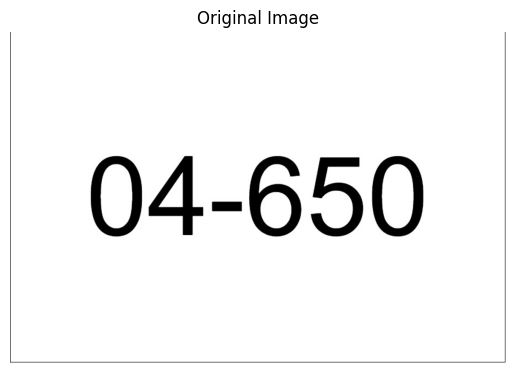

In [4]:
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

2. Obtain the SVD decomposition of the image and visualize the rank-1 matrix corresponding to the largest singular value

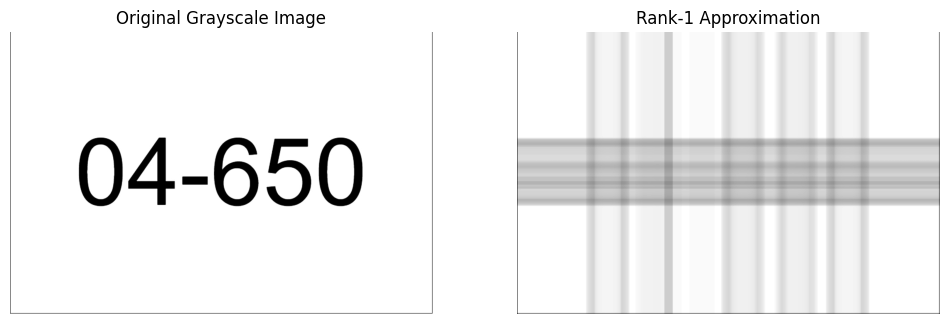

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to grayscale
image_gray = image.convert('L')
image_matrix = np.array(image_gray)

# Perform SVD
U, S, V_Transpose = np.linalg.svd(image_matrix, full_matrices=False)

# Reconstruct the rank-1 approximation
rank_1_matrix = np.outer(U[:, 0], V_Transpose[0]) * S[0]

# Plot the original grayscale image and the rank-1 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_matrix, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_1_matrix, cmap='gray')
axes[1].set_title('Rank-1 Approximation')
axes[1].axis('off')

plt.show()

3. Add up the rank-1 matrices for the top 3 singular values and visualize your result . whatd you your observe?

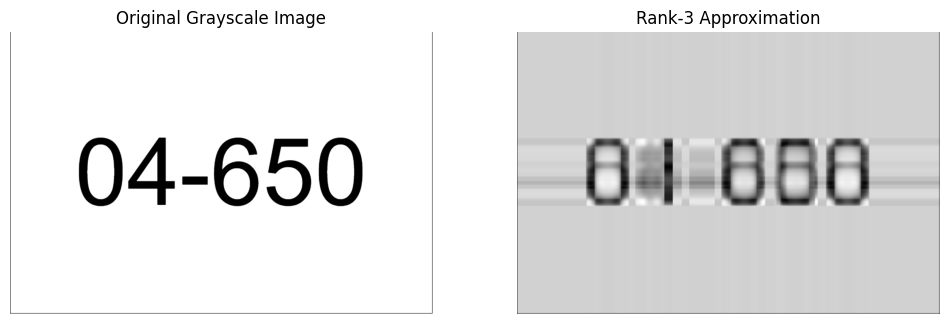

In [6]:
# Reconstruct the rank-1 matrices for the top 3 singular values
rank_1_matrix_1 = np.outer(U[:, 0], V_Transpose[0]) * S[0]
rank_1_matrix_2 = np.outer(U[:, 1], V_Transpose[1]) * S[1]
rank_1_matrix_3 = np.outer(U[:, 2], V_Transpose[2]) * S[2]

# Sum the rank-1 matrices
rank_3_matrix = rank_1_matrix_1 + rank_1_matrix_2 + rank_1_matrix_3

# Plot the original grayscale image and the rank-3 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_matrix, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_3_matrix, cmap='gray')
axes[1].set_title('Rank-3 Approximation')
axes[1].axis('off')

plt.show()

The more I add up the rank-1 matrices, our rank-3 approximated image approaches the original image, more features are covered

4. Add up the rank-1 matrices for the top 10 singular values and visualize your result . whatd you your observe?

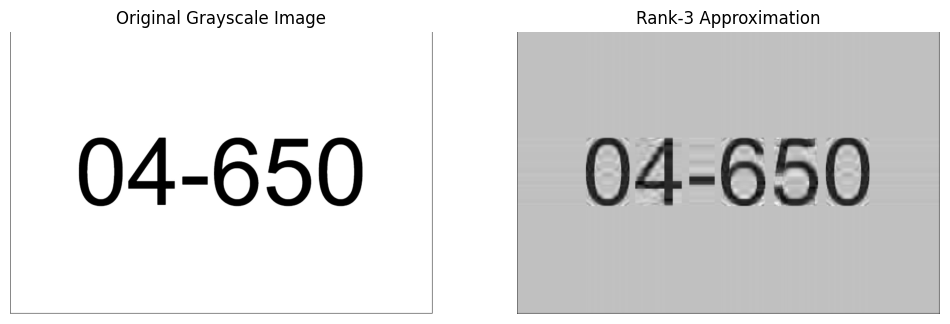

In [7]:
rank_1_matrix_4 = np.outer(U[:, 3], V_Transpose[3]) * S[3]
rank_1_matrix_5 = np.outer(U[:, 4], V_Transpose[4]) * S[4]
rank_1_matrix_6 = np.outer(U[:, 5], V_Transpose[5]) * S[5]
rank_1_matrix_7 = np.outer(U[:, 6], V_Transpose[6]) * S[6]
rank_1_matrix_8 = np.outer(U[:, 7], V_Transpose[7]) * S[7]
rank_1_matrix_9 = np.outer(U[:, 8], V_Transpose[8]) * S[8]
rank_1_matrix_10 = np.outer(U[:, 9], V_Transpose[9]) * S[9]

# Sum the rank-1 matrices
rank_10_matrix = rank_1_matrix_1 + rank_1_matrix_2 + rank_1_matrix_3 + rank_1_matrix_4 + rank_1_matrix_5 + rank_1_matrix_6 + rank_1_matrix_7 + rank_1_matrix_8 + rank_1_matrix_9 + rank_1_matrix_10

# Plot the original grayscale image and the rank-10 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_matrix, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_10_matrix, cmap='gray')
axes[1].set_title('Rank-3 Approximation')
axes[1].axis('off')

plt.show()

The more I add rank 1 approximations, the more close the approximate to the original image we get to

5. Assuming 1 byte of memory is required for one element of the image matrix, determine the top k rank-1 matrices required to represent the image if a compression ratio of 13:1 is desired. What is the value of k? Add up the rank-1 matrices for the top K singular values and visaulize your results. Remember to show your workings